In [1]:
# /content/drive/MyDrive/Colab Notebooks/homework7/data

In [10]:
import numpy as np
import os
import shutil
from pathlib import Path

In [11]:
root_annots_path = '/content/drive/MyDrive/Colab Notebooks/homework7/data/annotations/'
root_images_path = '/content/drive/MyDrive/Colab Notebooks/homework7/data/images/'

annots_path = sorted([i for i in Path(root_annots_path).glob('*.xml')])
images_path = sorted([i for i in Path(root_images_path).glob('*.png')])

n_imgs = len(images_path)

In [12]:
classes = np.array([
                    "white-pawn", "black-pawn",
                    "white-bishop", "black-bishop",
                    "white-knight", "black-knight",
                    "white-king", "black-king",
                    "white-queen", "black-queen",
                    "white-rook", "black-rook",
                    ])

In [13]:
with open(annots_path[50], 'r') as f:
    print(f.read())


<annotation>
    <folder>images</folder>
    <filename>chess54.png</filename>
    <size>
        <width>400</width>
        <height>225</height>
        <depth>3</depth>
    </size>
    <segmented>0</segmented>
    <object>
        <name>black-rook</name>
        <pose>Unspecified</pose>
        <truncated>0</truncated>
        <occluded>0</occluded>
        <difficult>0</difficult>
        <bndbox>
            <xmin>203</xmin>
            <ymin>144</ymin>
            <xmax>259</xmax>
            <ymax>213</ymax>
        </bndbox>
    </object>
    <object>
        <name>white-pawn</name>
        <pose>Unspecified</pose>
        <truncated>0</truncated>
        <occluded>0</occluded>
        <difficult>0</difficult>
        <bndbox>
            <xmin>296</xmin>
            <ymin>151</ymin>
            <xmax>359</xmax>
            <ymax>205</ymax>
        </bndbox>
    </object>
    <object>
        <name>black-knight</name>
        <pose>Unspecified</pose>
        <truncated>0</trunca

In [ ]:
os.makedirs('/content/drive/MyDrive/Colab Notebooks/homework7/imageai/data/train/images', exist_ok=True)
os.makedirs('/content/drive/MyDrive/Colab Notebooks/homework7/imageai/data/train/annotations', exist_ok=True)

os.makedirs('/content/drive/MyDrive/Colab Notebooks/homework7/imageai/data/validation/images', exist_ok=True)
os.makedirs('/content/drive/MyDrive/Colab Notebooks/homework7/imageai/data/validation/annotations', exist_ok=True)

os.makedirs('/content/drive/MyDrive/Colab Notebooks/homework7/imageai/data/test/images', exist_ok=True)
os.makedirs('/content/drive/MyDrive/Colab Notebooks/homework7/imageai/data/test/annotations', exist_ok=True)

In [9]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
n_imgs = 240
n_split = n_imgs // 20

for i, (annot_path, img_path) in enumerate(zip(annots_path, images_path)):
    if i < n_split:
        shutil.copy(img_path, '/content/drive/MyDrive/Colab Notebooks/homework7/imageai/data/test/images/' + img_path.parts[-1])
        shutil.copy(annot_path, '/content/drive/MyDrive/Colab Notebooks/homework7/imageai/data/test/annotations/' + annot_path.parts[-1])
    elif n_split <= i < n_split*5:
        shutil.copy(img_path, '/content/drive/MyDrive/Colab Notebooks/homework7/imageai/data/validation/images/' + img_path.parts[-1])
        shutil.copy(annot_path, '/content/drive/MyDrive/Colab Notebooks/homework7/imageai/data/validation/annotations/' + annot_path.parts[-1])
    else:
        shutil.copy(img_path, '/content/drive/MyDrive/Colab Notebooks/homework7/imageai/data/train/images/' + img_path.parts[-1])
        shutil.copy(annot_path, '/content/drive/MyDrive/Colab Notebooks/homework7/imageai/data/train/annotations/' + annot_path.parts[-1])

In [ ]:
print(len(list(Path('/content/drive/MyDrive/Colab Notebooks/homework7/imageai/data/train/annotations/').glob('*.xml'))))
print(len(list(Path('/content/drive/MyDrive/Colab Notebooks/homework7/imageai/data/test/annotations/').glob('*.xml'))))

21
12


In [14]:
!pip install imageai

     |████████████████████████████████| 163kB 8.7MB/s 
     |████████████████████████████████| 2.9MB 36.9MB/s 
     |████████████████████████████████| 2.1MB 43.9MB/s 
     |████████████████████████████████| 11.6MB 26.1MB/s 
     |████████████████████████████████| 14.9MB 252kB/s 
  Created wheel for keras-resnet: filename=keras_resnet-0.2.0-py2.py3-none-any.whl size=20486 sha256=8bae8f11d4531241961cefe237d3b16dd1dfec8f379fb408e434bf1e0cef0b09
  Stored in directory: /root/.cache/pip/wheels/5f/09/a5/497a30fd9ad9964e98a1254d1e164bcd1b8a5eda36197ecb3c
Successfully built keras-resnet
ERROR: tensorflow 2.5.0 has requirement h5py~=3.1.0, but you'll have h5py 2.10.0 which is incompatible.
ERROR: datascience 0.10.6 has requirement folium==0.2.1, but you'll have folium 0.8.3 which is incompatible.
ERROR: bokeh 2.3.2 has requirement pillow>=7.1.0, but you'll have pillow 7.0.0 which is incompatible.
ERROR: albumentations 0.1.12 has requirement imgaug<0.2.7,>=0.2.5, but you'll have imgaug 0.2.9 whic

In [17]:
from imageai.Detection.Custom import DetectionModelTrainer

trainer = DetectionModelTrainer()
trainer.setModelTypeAsYOLOv3()
trainer.setDataDirectory(data_directory="/content/drive/MyDrive/Colab Notebooks/homework7/imageai/data")
trainer.setTrainConfig(object_names_array=classes,
                       batch_size=8,
                       num_experiments=10,
                       train_from_pretrained_model="/content/drive/MyDrive/Colab Notebooks/homework7/pretrained-yolov3.h5",)

Generating anchor boxes for training images and annotation...
Average IOU for 9 anchors: 0.83
Anchor Boxes generated.
Detection configuration saved in  /content/drive/MyDrive/Colab Notebooks/homework7/imageai/data/json/detection_config.json


In [ ]:
trainer.trainModel()

Evaluating over 48 samples taken from /content/drive/MyDrive/Colab Notebooks/homework7/imageai/data/validation
Training over 21 samples  given at /content/drive/MyDrive/Colab Notebooks/homework7/imageai/data/train
Training on: 	['black-bishop', 'black-king', 'black-knight', 'black-pawn', 'black-queen', 'black-rook', 'white-bishop', 'white-king', 'white-knight', 'white-pawn', 'white-queen', 'white-rook']
Training with Batch Size:  8
Number of Training Samples:  21
Number of Validation Samples:  48
Number of Experiments:  10
Training with transfer learning from pretrained Model


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")
/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1940: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '
/usr/local/lib/python3.7/dist-packages/tensorflow/python/data/ops/dataset_ops.py:3704: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable.debug_mode()`.
  "Even though the `tf.config.experimental_run_functions_eagerly` "


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/utils/generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)


Epoch 1/10
24/24 [==============================] - 1250s 52s/step - loss: 153.1148 - yolo_layer_loss: 29.0958 - yolo_layer_1_loss: 54.3309 - yolo_layer_2_loss: 58.1119 - val_loss: 154.1852 - val_yolo_layer_loss: 27.2115 - val_yolo_layer_1_loss: 54.3893 - val_yolo_layer_2_loss: 61.0075
Epoch 2/10
24/24 [==============================] - 978s 41s/step - loss: 99.4258 - yolo_layer_loss: 17.5362 - yolo_layer_1_loss: 33.7785 - yolo_layer_2_loss: 36.5334 - val_loss: 136.2462 - val_yolo_layer_loss: 23.5238 - val_yolo_layer_1_loss: 46.2754 - val_yolo_layer_2_loss: 54.8686
Epoch 3/10
24/24 [==============================] - 1091s 45s/step - loss: 87.3016 - yolo_layer_loss: 18.1550 - yolo_layer_1_loss: 27.7364 - yolo_layer_2_loss: 29.8311 - val_loss: 112.8737 - val_yolo_layer_loss: 20.4905 - val_yolo_layer_1_loss: 40.2425 - val_yolo_layer_2_loss: 40.5607
Epoch 4/10
24/24 [==============================] - 1041s 44s/step - loss: 77.2532 - yolo_layer_loss: 16.0149 - yolo_layer_1_loss: 23.4164 - y

In [18]:
from imageai.Detection.Custom import DetectionModelTrainer

trainer = DetectionModelTrainer()
trainer.setModelTypeAsYOLOv3()
trainer.setDataDirectory(data_directory="/content/drive/MyDrive/Colab Notebooks/homework7/imageai/data/")
metrics = trainer.evaluateModel(model_path="/content/drive/MyDrive/Colab Notebooks/homework7/imageai/data/models/detection_model-ex-007--loss-0063.150.h5",
                                json_path="/content/drive/MyDrive/Colab Notebooks/homework7/imageai/data/json/detection_config.json",
                                iou_threshold=0.2,
                                object_threshold=0.3,
                                nms_threshold=0.5)

Starting Model evaluation....
Evaluating over 48 samples taken from /content/drive/MyDrive/Colab Notebooks/homework7/imageai/data/validation
Training over 21 samples  given at /content/drive/MyDrive/Colab Notebooks/homework7/imageai/data/train
Model File:  /content/drive/MyDrive/Colab Notebooks/homework7/imageai/data/models/detection_model-ex-007--loss-0063.150.h5 

Evaluation samples:  48
Using IoU:  0.2
Using Object Threshold:  0.3
Using Non-Maximum Suppression:  0.5
black-bishop: 0.0001
black-king: 0.0000
black-knight: 0.0000
black-pawn: 0.0000
black-queen: 0.0000
black-rook: 0.0000
white-bishop: 0.0000
white-king: 0.0000
white-knight: 0.0000
white-pawn: 0.0000
white-queen: 0.0000
white-rook: 0.0000
mAP: 0.0000


In [30]:
from imageai.Detection.Custom import CustomObjectDetection

detector = CustomObjectDetection()
detector.setModelTypeAsYOLOv3()
detector.setModelPath("/content/drive/MyDrive/Colab Notebooks/homework7/imageai/data/models/detection_model-ex-007--loss-0063.150.h5")
detector.setJsonPath("/content/drive/MyDrive/Colab Notebooks/homework7/imageai/data/json/detection_config.json")
detector.loadModel()
detections = detector.detectObjectsFromImage(minimum_percentage_probability=34.97,
                                             input_image="/content/drive/MyDrive/Colab Notebooks/homework7/imageai/data/validation/images/chess41.png",
                                             output_image_path="/content/drive/MyDrive/Colab Notebooks/homework7/detected.jpg")
for detection in detections:
    print(detection["name"], " : ", detection["percentage_probability"], " : ", detection["box_points"])

/usr/local/lib/python3.7/dist-packages/tensorflow/python/data/ops/dataset_ops.py:3704: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable.debug_mode()`.
  "Even though the `tf.config.experimental_run_functions_eagerly` "


black-bishop  :  34.97261106967926  :  [42, 149, 56, 191]


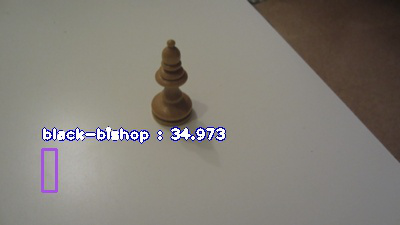

In [32]:
from PIL import Image
Image.open('/content/drive/MyDrive/Colab Notebooks/homework7/detected.jpg')